In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('CSCI_Fall_2024_survey.csv')

In [17]:
data.head()

,Timestamp,What is your name?,What are your pronouns?,What state/country were you born in?,How many siblings do you have?,How much experience do you have programming?,What class are you in?,Are you working while in school?,How many pets and of which kind do you have?,What is your favorite type of food?,Where do you live?,Do you take the metro?,What is your major?,How old are you?,What is your favorite TV show?,What is your favorite video game?,What is your favorite book?,Why are you taking this class?,Whats your favorite bash command?
0,2024/09/05 6:10:09 PM EST,Alex,He/Him,Mexico,1,1-2 years,Freshman,No,"1, Dog",Japanese,Off campus,No,Computer Science,18,Friends,Persona Series,Anything about mythology,My major,cd and ls
1,2024/09/05 6:33:51 PM EST,Tanay,He/Him,Missouri,1,0-3 months,Freshman,No,0,Mexican,On campus,No,CS/Business,18,Suits,Super Smash bros,Percy Jackson,To get a deeper understanding and basics of cs,ls
2,2024/09/05 6:34:21 PM EST,Akshita,She/Her,"Frankfurt, Germany",1,0-3 months,Freshman,No,no pets!,Italian,On campus,No,Data Science,18,How I Met Your Mother,Mario Kart,Harry Potter,To learn programming for my major!,git commit
3,2024/09/05 6:35:03 PM EST,Anthony,He/Him,Wisconsin,1,0-3 months,Senior,Yes,I have two dogs and they are both at home,Italian,Off campus,No,Business Economics,21,Breaking Bad,Call of Duty,NaN,Programming has always been an interest of mine,ls
4,2024/09/05 6:35:56 PM EST,Nuri,He/Him,"st. louis, mo",2,1-2 years,Freshman,No,0,American,On campus,No,computer science,18,Hunter x Hunter,valorant,berserk,interested in having a career in data,ls


In [18]:
data['What state/country were you born in?'] = data['What state/country were you born in?'].str.title().replace({
    'St. Louis, Mo': 'Missouri',
    'Frankfurt, Germany': 'Germany',
    'Mexico City, Mexico': 'Mexico',
})

data['How many pets and of which kind do you have?'] = data['How many pets and of which kind do you have?'].str.lower().replace({
    '0': '0 Pets',
    'no pets!': '0 Pets',
    'none': '0 Pets',
    '1, dog': '1 Pet',
    'one cat': '1 Pet',
    'i have two dogs and they are both at home': '2 Pets',
    '2 dogs and 1 cat': '3+ Pets',
    'i have 3 cats': '3+ Pets',
})

data[['How many pets and of which kind do you have?']].head()

data['What is your favorite type of food?'] = data['What is your favorite type of food?'].str.title().replace({
    'Italian': 'Italian',
    'Japanese': 'Asian',
    'Chinese': 'Asian',
    'American': 'American',
    'Mexican': 'Mexican', 
    'korean': 'Asian'
})

data['What is your major?'] = data['What is your major?'].str.title().replace({
    'Computer Science': 'Computer Science',
    'Cs/Business': 'Computer Science/Business',
    'Data Science': 'Data Science',
    'Business Economics': 'Business Economics',
    'computer science': 'Computer Science',
})


data['How old are you?'] = data['How old are you?'].replace({
    '18': '18',
    '21': '21',
})
data[['What state/country were you born in?', 'How many pets and of which kind do you have?', 
      'What is your favorite type of food?', 'What is your major?', 'How old are you?']].head()



,What state/country were you born in?,How many pets and of which kind do you have?,What is your favorite type of food?,What is your major?,How old are you?
0,Mexico,1 Pet,Asian,Computer Science,18
1,Missouri,0 Pets,Mexican,Computer Science/Business,18
2,Germany,0 Pets,Italian,Data Science,18
3,Wisconsin,2 Pets,Italian,Business Economics,21
4,Missouri,0 Pets,American,Computer Science,18


In [40]:
def clean_location(location):
    location = location.strip().lower()
    if 'frankfurt' in location or 'germany' in location:
        return 'Germany'
    elif 'st. louis' in location or 'missouri' in location:
        return 'Missouri, USA'
    elif 'mexico' in location:
        return 'Mexico'
    elif 'wisconsin' in location:
        return 'Wisconsin, USA'
    else:
        return location.title()

def clean_pets(pets):
    if isinstance(pets, str):
        pets = pets.lower().strip()
        if 'no pets' in pets or pets == '0':
            return 'No pets'
        elif 'dog' in pets and 'two' in pets:
            return '2 Dogs'
        elif 'dog' in pets or '1' in pets:
            return '1 Dog'
        else:
            return 'Other'

def clean_favorite_food(food):
    food = food.lower().strip()
    if 'japanese' in food:
        return 'Asian'
    elif 'italian' in food:
        return 'Italian'
    elif 'mexican' in food:
        return 'Mexican'
    elif 'american' in food:
        return 'American'
    else:
        return 'Other'

def clean_major(major):
    major = major.lower().strip()
    if 'computer science' in major or 'cs' in major:
        return 'Computer Science'
    elif 'data science' in major:
        return 'Data Science'
    elif 'business' in major:
        return 'Business'
    else:
        return major.title()

def clean_age(age):
        return int(age)

cleaned_data = data.copy()

cleaned_data['What state/country were you born in?'] = cleaned_data['What state/country were you born in?'].apply(clean_location)
cleaned_data['How many pets and of which kind do you have?'] = cleaned_data['How many pets and of which kind do you have?'].apply(clean_pets)
cleaned_data['What is your favorite type of food?'] = cleaned_data['What is your favorite type of food?'].apply(clean_favorite_food)
cleaned_data['What is your major?'] = cleaned_data['What is your major?'].apply(clean_major)
cleaned_data['How old are you?'] = cleaned_data['How old are you?'].apply(clean_age)


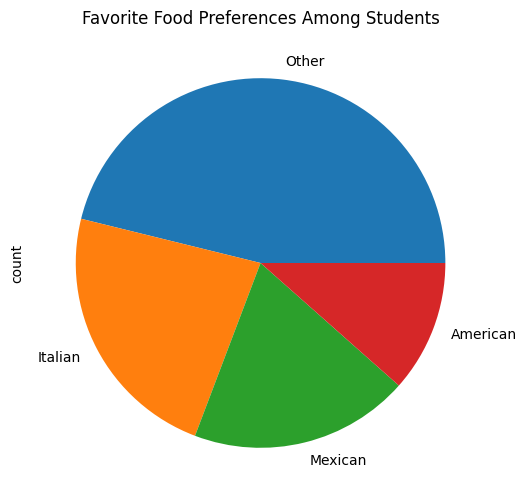

In [41]:
#Creates a pie chart for favorite type of food
food_counts = cleaned_data['What is your favorite type of food?'].value_counts()

plt.figure(figsize=(6,6))
food_counts.plot(kind='pie', labels=food_counts.index)

plt.title('Favorite Food Preferences Among Students')

plt.show()

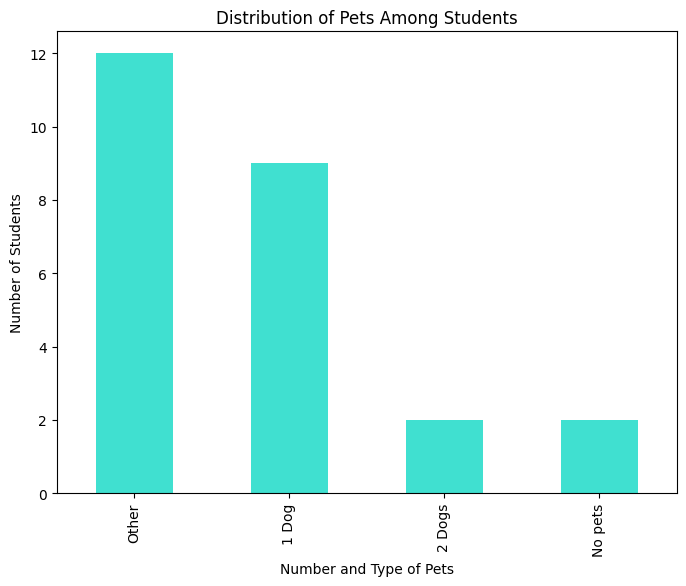

In [42]:
# Creates a bar chart displaying amount of pets people have.
pet_counts = cleaned_data['How many pets and of which kind do you have?'].value_counts()

plt.figure(figsize=(8,6))
pet_counts.plot(kind='bar', color='turquoise')

plt.title('Distribution of Pets Among Students')
plt.xlabel('Number and Type of Pets')
plt.ylabel('Number of Students')

plt.show()

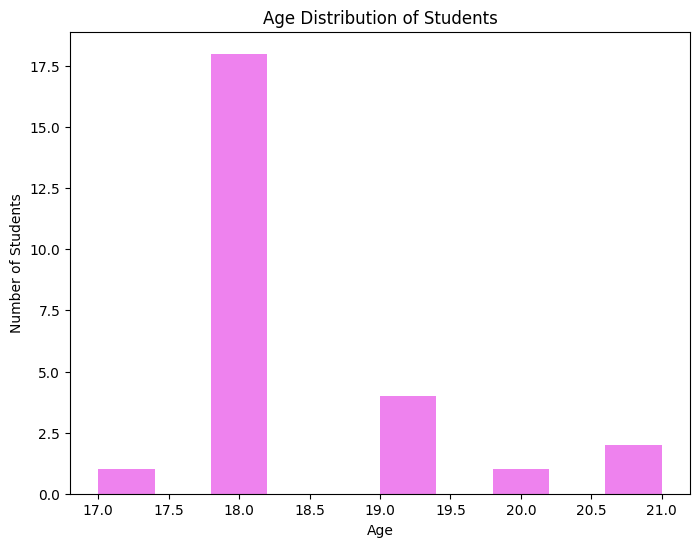

In [43]:
#Creates a histogram for age distribution.
plt.figure(figsize=(8,6))
cleaned_data['How old are you?'].plot(kind='hist', color='violet')

plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Number of Students')

plt.show()

<Figure size 800x600 with 0 Axes>

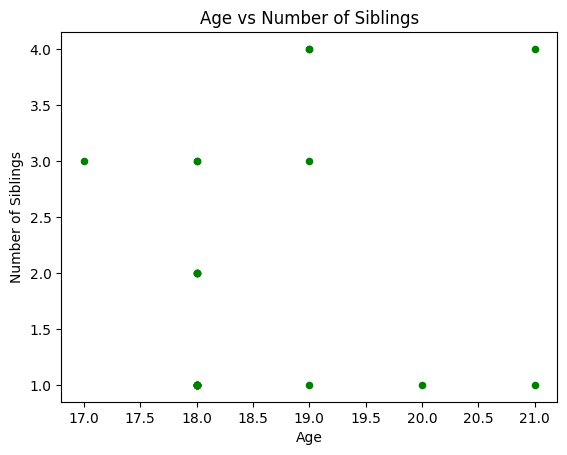

In [44]:
#Creates a scatter plot that shows relationship between a person's age and how many siblings they have.
plt.figure(figsize=(8,6))
cleaned_data.plot(kind='scatter', x='How old are you?', y='How many siblings do you have?', color='green')

plt.title('Age vs Number of Siblings')
plt.xlabel('Age')
plt.ylabel('Number of Siblings')

plt.show()

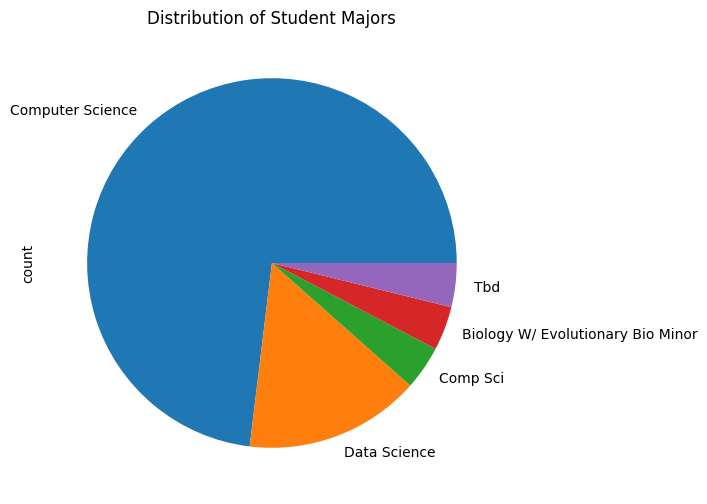

In [45]:
#Creates a pie chart for majors
major_counts = cleaned_data['What is your major?'].value_counts()

plt.figure(figsize=(6,6))
major_counts.plot(kind='pie', labels=major_counts.index)

plt.title('Distribution of Student Majors')

plt.show()
